In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **About this file**



The dataset consists of patient information, including demographic details like age, sex, and state, along with health-related factors such as general health, BMI, and medical history. It covers conditions like heart disease, stroke, diabetes, and asthma, as well as lifestyle choices like smoking, alcohol consumption, and vaccination status.

---



-

## **Problem statement**

---





**Preddiction**

---

- With HadHeartAttack as the prediction variable, the task would involve using other features in the dataset to predict whether a patient has experienced a heart attack. This could be approached as a binary classification problem, where the model learns patterns from the other variables to predict the likelihood of HadHeartAttack (0 for no, 1 for yes).

-

Heart disease is one of the leading causes of mortality worldwide, with heart attacks being a primary manifestation. Early detection and intervention can significantly reduce the risk and improve patient outcomes. In this project, we aim to develop a predictive model that leverages patient demographic, health, and lifestyle information to determine the likelihood of a heart attack occurrence. By analyzing this data, healthcare providers may gain insights into high-risk patients, enabling proactive measures and better allocation of medical resources.

The objective is to predict whether a patient has had a heart attack (binary outcome: HadHeartAttack) based on a range of features, including medical history, lifestyle habits, and demographic details. This model could serve as an assistive tool in clinical decision-making and help in implementing preventive healthcare strategies.


**Features**

---



---



Column  	                   -      Description	   



---

Here’s a description of the features in your dataset, which appear to cover demographic information, general health conditions, and lifestyle factors:

1. **PatientID**: Unique identifier for each patient.
2. **State**: U.S. state where the patient resides.
3. **Sex**: Patient’s gender (e.g., Male, Female).
4. **GeneralHealth**: Self-reported health status (e.g., Excellent, Very good, Good, Fair, Poor).
5. **AgeCategory**: Age range of the patient (e.g., Age 65 to 69, Age 50 to 54).
6. **HeightInMeters**: Patient’s height in meters.
7. **WeightInKilograms**: Patient’s weight in kilograms.
8. **BMI**: Body Mass Index, calculated based on height and weight.
9. **HadHeartAttack**: Target variable indicating if the patient has had a heart attack (`1` for Yes, `0` for No).
10. **HadAngina**: Indicates if the patient has had angina (chest pain caused by reduced blood flow to the heart) (`1` for Yes, `0` for No).
11. **HadStroke**: Indicates if the patient has had a stroke (`1` for Yes, `0` for No).
12. **HadAsthma**: Indicates if the patient has had asthma (`1` for Yes, `0` for No).
13. **HadSkinCancer**: Indicates if the patient has had skin cancer (`1` for Yes, `0` for No).
14. **HadCOPD**: Indicates if the patient has had chronic obstructive pulmonary disease (COPD) (`1` for Yes, `0` for No).
15. **HadDepressiveDisorder**: Indicates if the patient has had a depressive disorder (`1` for Yes, `0` for No).
16. **HadKidneyDisease**: Indicates if the patient has had kidney disease (`1` for Yes, `0` for No).
17. **HadArthritis**: Indicates if the patient has had arthritis (`1` for Yes, `0` for No).
18. **HadDiabetes**: Indicates if the patient has had diabetes. This feature may include categorical values indicating the type or status of diabetes.
19. **DeafOrHardOfHearing**: Indicates if the patient is deaf or hard of hearing (`1` for Yes, `0` for No).
20. **BlindOrVisionDifficulty**: Indicates if the patient has blindness or vision difficulty (`1` for Yes, `0` for No).
21. **DifficultyConcentrating**: Indicates if the patient has difficulty concentrating (`1` for Yes, `0` for No).
22. **DifficultyWalking**: Indicates if the patient has difficulty walking (`1` for Yes, `0` for No).
23. **DifficultyDressingBathing**: Indicates if the patient has difficulty dressing or bathing (`1` for Yes, `0` for No).
24. **DifficultyErrands**: Indicates if the patient has difficulty running errands alone (`1` for Yes, `0` for No).
25. **SmokerStatus**: Indicates the patient’s smoking status (e.g., Current smoker, Former smoker, Never smoked).
26. **ECigaretteUsage**: Indicates the patient’s e-cigarette usage status (e.g., Never used, Former user, Current user).
27. **ChestScan**: Indicates if the patient has had a chest scan (`1` for Yes, `0` for No).
28. **RaceEthnicityCategory**: Patient’s race/ethnicity category (e.g., White, Non-Hispanic; Black, Non-Hispanic).
29. **AlcoholDrinkers**: Indicates if the patient consumes alcohol (`1` for Yes, `0` for No).
30. **HIVTesting**: Indicates if the patient has been tested for HIV (`1` for Yes, `0` for No).
31. **FluVaxLast12**: Indicates if the patient received a flu vaccine in the last 12 months (`1` for Yes, `0` for No).
32. **PneumoVaxEver**: Indicates if the patient has ever received the pneumococcal vaccine (`1` for Yes, `0` for No).
33. **TetanusLast10Tdap**: Indicates if the patient received a tetanus shot in the last 10 years, specifying type where available.
34. **HighRiskLastYear**: Indicates if the patient was considered high-risk in the past year (`1` for Yes, `0` for No).
35. **CovidPos**: Indicates if the patient has tested positive for COVID-19 (`1` for Yes, `0` for No).



-






**Target Variable**


---

**HadHeartAttack**: Target variable indicating if the patient has had a heart attack (`1` for Yes, `0` for No).

# Understanding Data

In [418]:
df=pd.read_csv("/content/Patients Data ( Used for Heart Disease Prediction ) (1).csv")
df

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [420]:
df.isnull().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


In [421]:
df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,...,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000
mean,118815.500000,1.704990,83.667908,28.691602,0.055553,0.061512,0.041779,0.148517,0.085225,0.078281,...,0.148933,0.034524,0.067567,0.426941,0.545285,0.342697,0.531907,0.407125,0.042823,0.295939
std,68598.016571,0.106776,21.360982,6.528065,0.229056,0.240267,0.200085,0.355612,0.279217,0.268614,...,0.356023,0.182572,0.251002,0.494635,0.497946,0.474612,0.498982,0.491299,0.202458,0.456465
min,1.000000,0.910000,28.120001,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59408.250000,1.630000,68.040001,24.280001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118815.500000,1.700000,81.650002,27.459999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,178222.750000,1.780000,95.250000,31.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237630.000000,2.410000,292.570007,97.650002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [422]:
df.drop(["PatientID"],inplace=True,axis=1) # PatientID dosen't matter for the prediction

In [423]:
df["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Arkansas',
       'Connecticut', 'Colorado', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Indiana', 'District of Columbia', 'Kansas',
       'Iowa', 'Maryland', 'Minnesota', 'Montana', 'New Jersey',
       'Nebraska', 'New York', 'Ohio', 'Oklahoma', 'Texas', 'Vermont',
       'Washington', 'Utah', 'Illinois', 'West Virginia', 'Virginia',
       'Massachusetts', 'Kentucky', 'Louisiana', 'Maine', 'Wisconsin',
       'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Hampshire',
       'New Mexico', 'South Carolina', 'North Carolina', 'North Dakota',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota',
       'Tennessee', 'Wyoming', 'Guam', 'Puerto Rico', 'Virgin Islands'],
      dtype=object)

In [424]:
count_state=df['State'].value_counts()

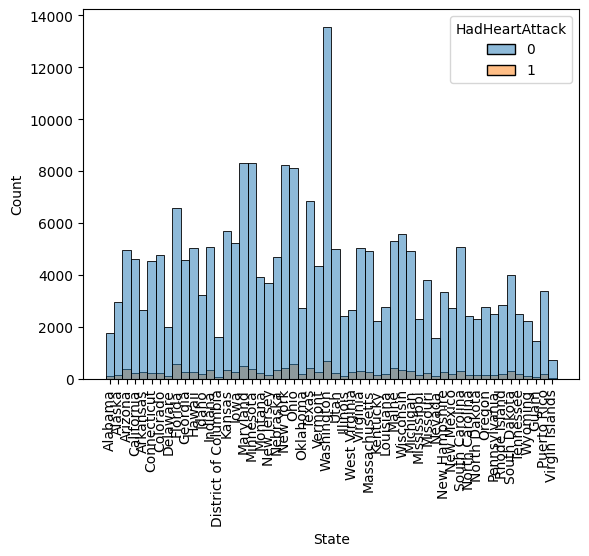

In [425]:
sns.histplot(data=df, x='State', hue='HadHeartAttack')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

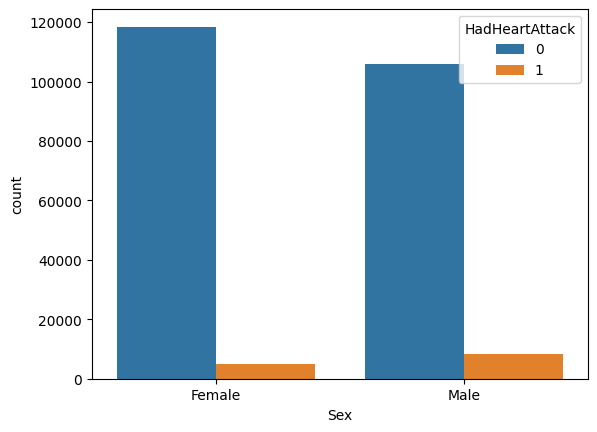

In [426]:
sns.countplot(data=df, x='Sex', hue='HadHeartAttack')
plt.show()

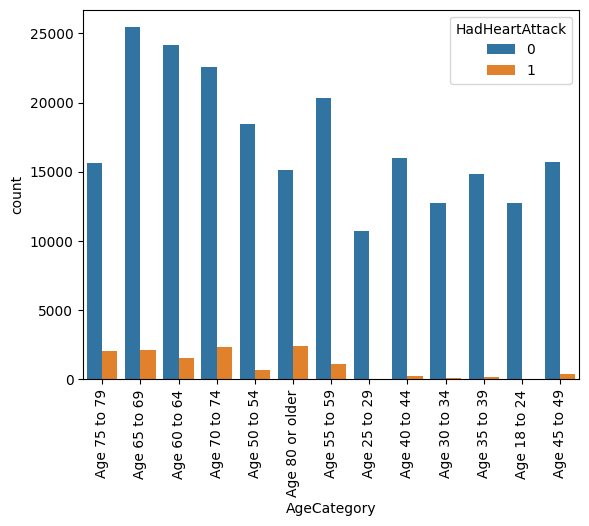

In [427]:
sns.countplot(data=df, x='AgeCategory', hue='HadHeartAttack')
plt.xticks(rotation=90)
plt.show()

In [428]:
df['GeneralHealth'].unique()

array(['Fair', 'Very good', 'Excellent', 'Good', 'Poor'], dtype=object)

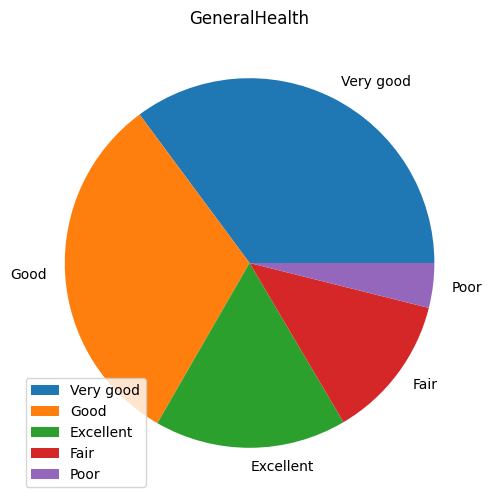

In [429]:
general_health = df['GeneralHealth'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(general_health,labels=general_health.index)
plt.title('GeneralHealth')
plt.legend(labels=general_health.index)
plt.show()

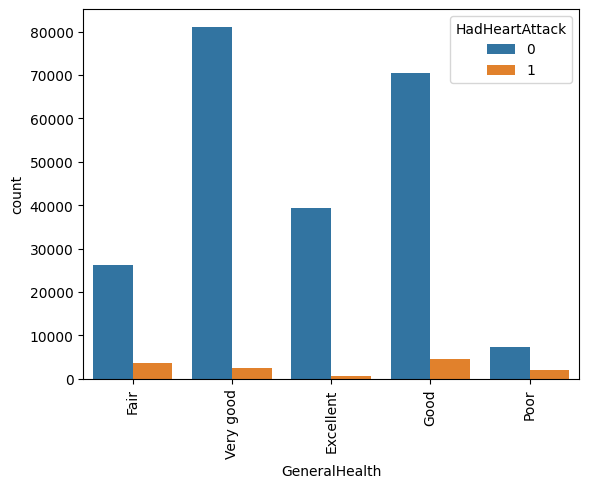

In [430]:
sns.countplot(data=df, x='GeneralHealth', hue='HadHeartAttack')
plt.xticks(rotation=90)
plt.show()

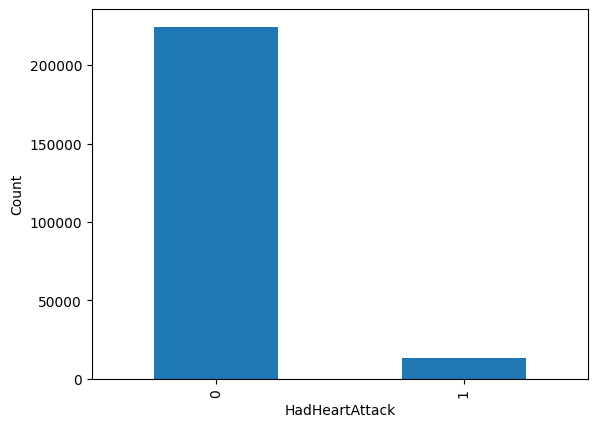

In [431]:
df["HadHeartAttack"].value_counts().plot(kind='bar') # The 'HadHeartAttack' class has been oversampled to address class imbalance
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

In [432]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      237630 non-null  object 
 1   Sex                        237630 non-null  object 
 2   GeneralHealth              237630 non-null  object 
 3   AgeCategory                237630 non-null  object 
 4   HeightInMeters             237630 non-null  float64
 5   WeightInKilograms          237630 non-null  float64
 6   BMI                        237630 non-null  float64
 7   HadHeartAttack             237630 non-null  int64  
 8   HadAngina                  237630 non-null  int64  
 9   HadStroke                  237630 non-null  int64  
 10  HadAsthma                  237630 non-null  int64  
 11  HadSkinCancer              237630 non-null  int64  
 12  HadCOPD                    237630 non-null  int64  
 13  HadDepressiveDisorder      23

In [434]:
object_columns = df.select_dtypes(include='object') # to select all columns of type object
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   State                  237630 non-null  object
 1   Sex                    237630 non-null  object
 2   GeneralHealth          237630 non-null  object
 3   AgeCategory            237630 non-null  object
 4   HadDiabetes            237630 non-null  object
 5   SmokerStatus           237630 non-null  object
 6   ECigaretteUsage        237630 non-null  object
 7   RaceEthnicityCategory  237630 non-null  object
 8   TetanusLast10Tdap      237630 non-null  object
dtypes: object(9)
memory usage: 16.3+ MB


In [435]:
object_columns

,State,Sex,GeneralHealth,AgeCategory,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,TetanusLast10Tdap
0,Alabama,Female,Fair,Age 75 to 79,Yes,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic","No, did not receive any tetanus shot in the pa..."
1,Alabama,Female,Very good,Age 65 to 69,No,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic","Yes, received Tdap"
2,Alabama,Male,Excellent,Age 60 to 64,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic","Yes, received tetanus shot but not sure what type"
3,Alabama,Male,Very good,Age 70 to 74,Yes,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic","Yes, received tetanus shot but not sure what type"
4,Alabama,Female,Good,Age 50 to 54,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic","No, did not receive any tetanus shot in the pa..."
...,...,...,...,...,...,...,...,...,...
237625,Puerto Rico,Female,Good,Age 60 to 64,Yes,Never smoked,Not at all (right now),Hispanic,"No, did not receive any tetanus shot in the pa..."
237626,Puerto Rico,Female,Good,Age 55 to 59,No,Former smoker,Not at all (right now),Hispanic,"Yes, received Tdap"
237627,Puerto Rico,Male,Fair,Age 45 to 49,No,Current smoker - now smokes every day,Not at all (right now),Hispanic,"Yes, received Tdap"
237628,Puerto Rico,Female,Very good,Age 25 to 29,No,Never smoked,Never used e-cigarettes in my entire life,Hispanic,"No, did not receive any tetanus shot in the pa..."


In [436]:
df.nunique()

,0
State,54
Sex,2
GeneralHealth,5
AgeCategory,13
HeightInMeters,101
WeightInKilograms,513
BMI,3503
HadHeartAttack,2
HadAngina,2
HadStroke,2


In [437]:
print(df["HadDiabetes"].unique()) # to check the data ordinal or not
print(df["SmokerStatus"].unique())
print(df["ECigaretteUsage"].unique())
print(df["RaceEthnicityCategory"].unique())
print(df["TetanusLast10Tdap"].unique())

['Yes' 'No' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (female)']
['Former smoker' 'Never smoked' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']
['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them some days' 'Use them every day']
['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']
['No, did not receive any tetanus shot in the past 10 years'
 'Yes, received Tdap' 'Yes, received tetanus shot but not sure what type'
 'Yes, received tetanus shot, but not Tdap']


In [438]:
df["TetanusLast10Tdap"].replace([
'No, did not receive any tetanus shot in the past 10 years',
    'Yes, received tetanus shot, but not Tdap',
    'Yes, received tetanus shot but not sure what type',
    'Yes, received Tdap'],[1,2,3,4], inplace=True)

<ipython-input-438-1855894248>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TetanusLast10Tdap"].replace([
<ipython-input-438-1855894248>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TetanusLast10Tdap"].replace([


In [439]:
df["ECigaretteUsage"].replace(['Never used e-cigarettes in my entire life', 'Not at all (right now)',
 'Use them some days', 'Use them every day'], [1,2,3,4], inplace=True)

<ipython-input-439-1406506023>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ECigaretteUsage"].replace(['Never used e-cigarettes in my entire life', 'Not at all (right now)',
<ipython-input-439-1406506023>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ECigaretteUsage"].replace(['Never 

In [440]:
df["SmokerStatus"].replace(['Never smoked', 'Former smoker', 'Current smoker - now smokes some days',
 'Current smoker - now smokes every day'],[1,2,3,4],inplace=True)

<ipython-input-440-3893278811>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SmokerStatus"].replace(['Never smoked', 'Former smoker', 'Current smoker - now smokes some days',
<ipython-input-440-3893278811>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["SmokerStatus"].replace(['Never smo

In [441]:
df["HadDiabetes"].replace(['No',
              'No, pre-diabetes or borderline diabetes',
              'Yes, but only during pregnancy (female)',
              'Yes'],[1,2,3,4],inplace=True)

<ipython-input-441-3853757314>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["HadDiabetes"].replace(['No',
<ipython-input-441-3853757314>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["HadDiabetes"].replace(['No',


In [442]:
df["State"]=le.fit_transform(df["State"])
df["Sex"]=le.fit_transform(df["Sex"])
df["AgeCategory"]=le.fit_transform(df["AgeCategory"])
df["RaceEthnicityCategory"]=le.fit_transform(df["RaceEthnicityCategory"])

In [443]:
df["GeneralHealth"].replace(
    ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    [1, 2, 3, 4, 5],
    inplace=True
)

<ipython-input-443-4026526066>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GeneralHealth"].replace(
<ipython-input-443-4026526066>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["GeneralHealth"].replace(


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      237630 non-null  int64  
 1   Sex                        237630 non-null  int64  
 2   GeneralHealth              237630 non-null  int64  
 3   AgeCategory                237630 non-null  int64  
 4   HeightInMeters             237630 non-null  float64
 5   WeightInKilograms          237630 non-null  float64
 6   BMI                        237630 non-null  float64
 7   HadHeartAttack             237630 non-null  int64  
 8   HadAngina                  237630 non-null  int64  
 9   HadStroke                  237630 non-null  int64  
 10  HadAsthma                  237630 non-null  int64  
 11  HadSkinCancer              237630 non-null  int64  
 12  HadCOPD                    237630 non-null  int64  
 13  HadDepressiveDisorder      23

In [445]:
# After the finding it's imbalanced so oversampling method is used
from imblearn.over_sampling import SMOTE
x=df.drop('HadHeartAttack',axis=1)
y=df['HadHeartAttack']
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(x,y)
df=pd.concat([X_resampled,y_resampled],axis=1)

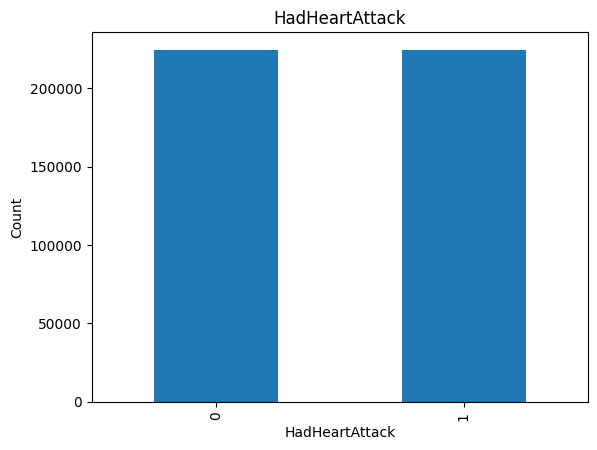

In [446]:
df["HadHeartAttack"].value_counts().plot(kind='bar')
plt.title('HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

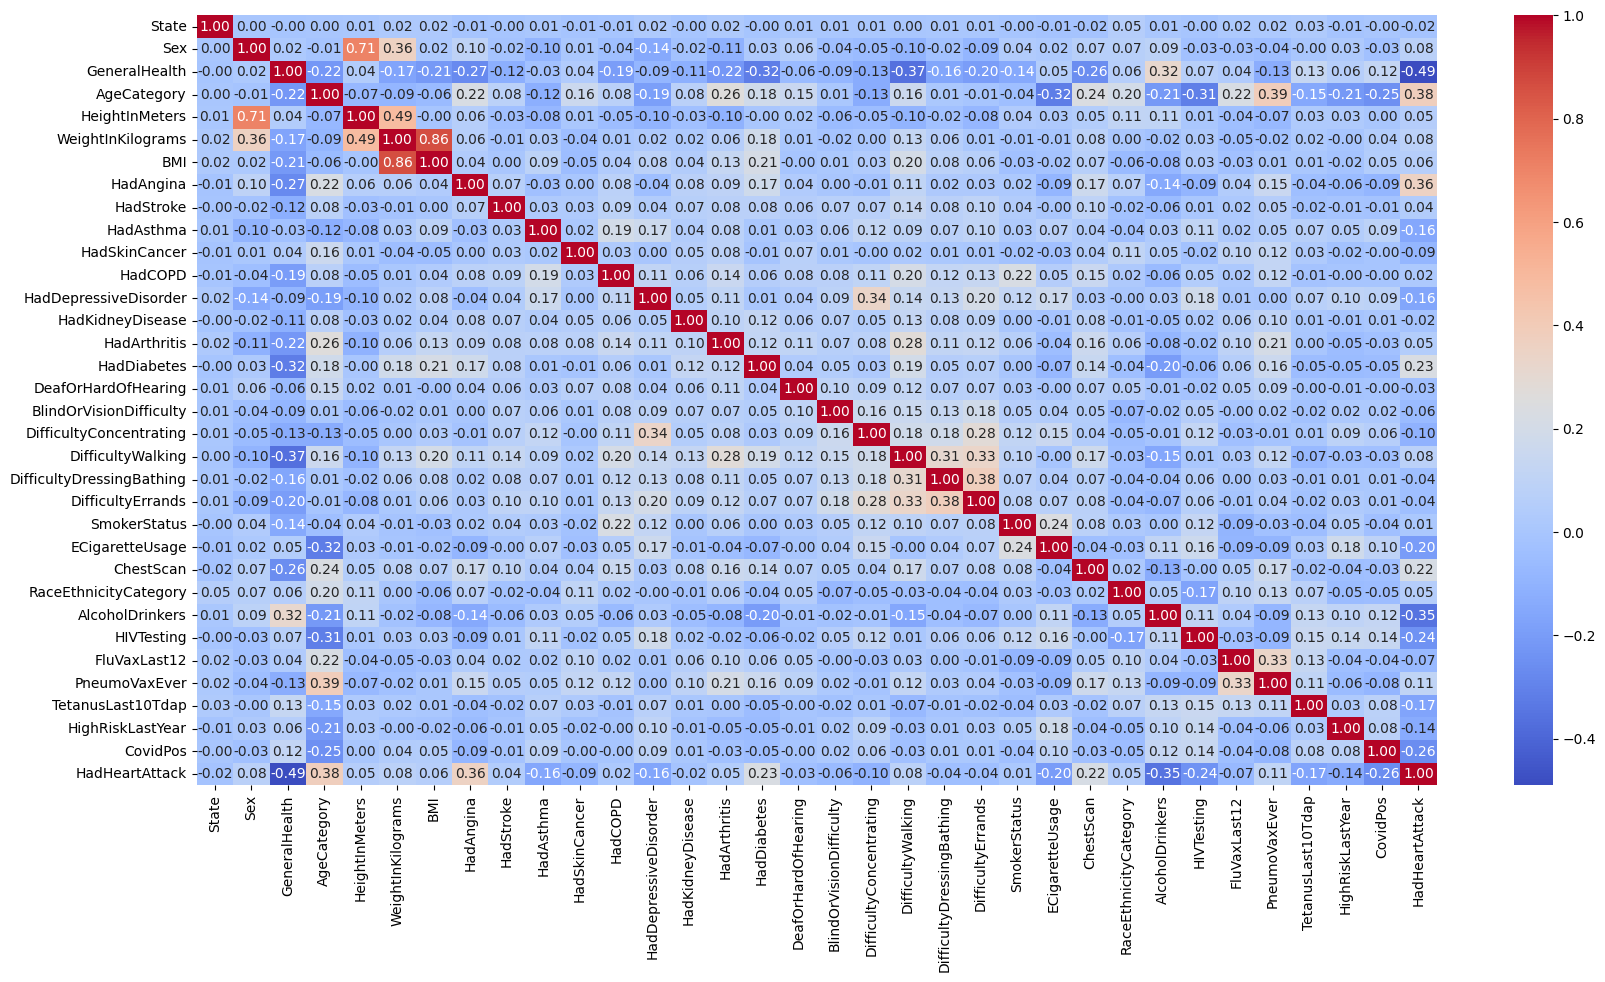

In [447]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [448]:
df.drop(["State","Sex","HeightInMeters","WeightInKilograms","BMI","HadStroke","HadAngina","HadSkinCancer","HadCOPD","HadKidneyDisease","HadArthritis","DeafOrHardOfHearing","BlindOrVisionDifficulty","DifficultyWalking","DifficultyDressingBathing","DifficultyErrands","SmokerStatus","RaceEthnicityCategory","FluVaxLast12","TetanusLast10Tdap","HighRiskLastYear","DifficultyConcentrating","PneumoVaxEver","HadDepressiveDisorder","HadAsthma"],axis=1,inplace=True)

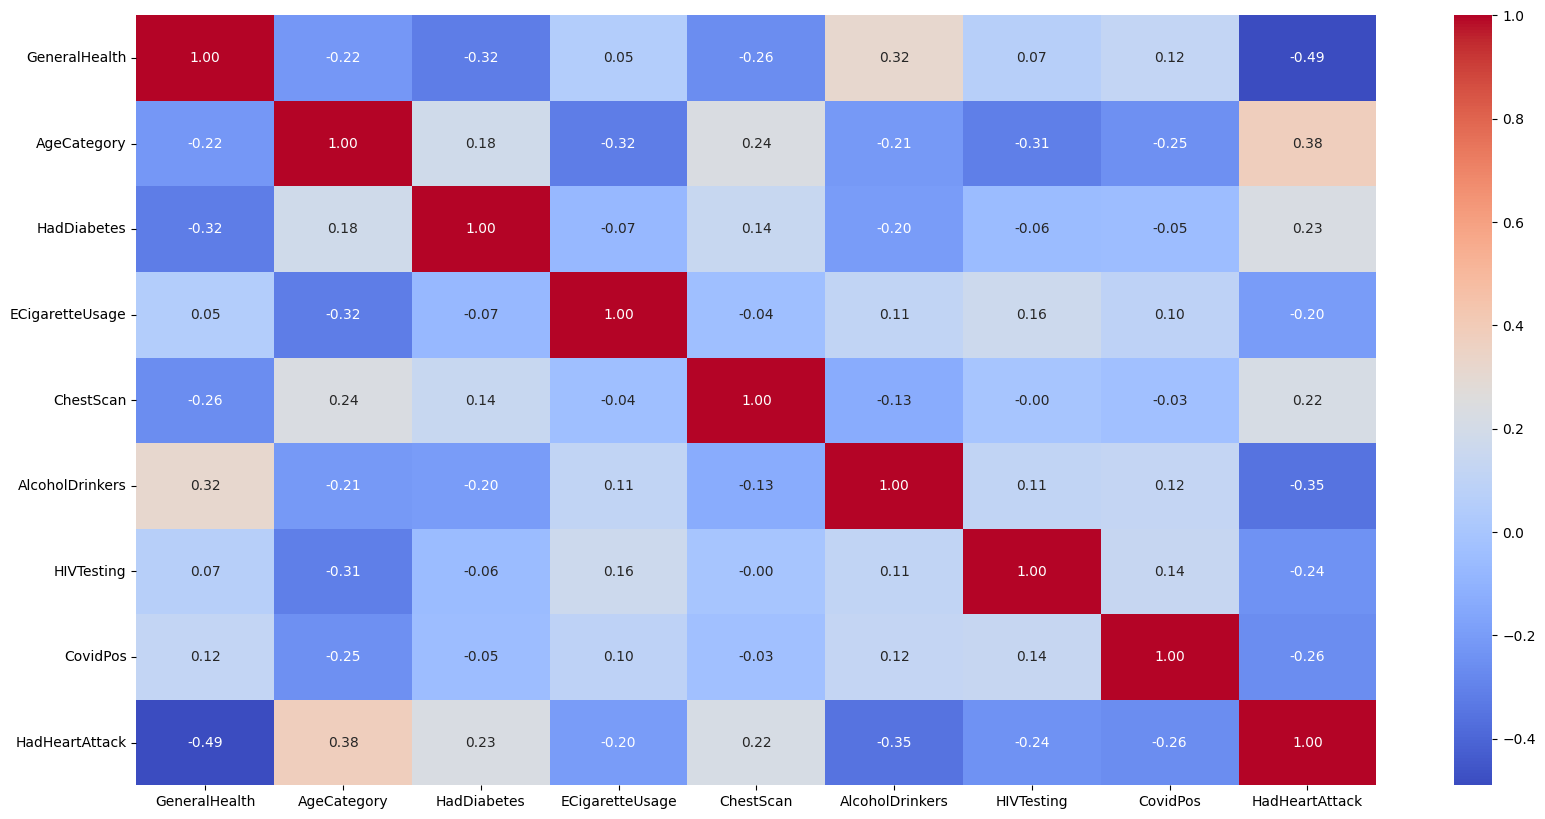

In [449]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [450]:
 x=df.drop('HadHeartAttack',axis=1)

In [451]:
y=df["HadHeartAttack"]

In [452]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [453]:
model.fit(x_train,y_train)

LogisticRegression()

In [454]:
model.predict(x_test)

array([0, 1, 1, ..., 1, 0, 1])

In [455]:
model.score(x_test,y_test)

0.7902865035868645

# Remove Outliers

In [456]:
 def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='HadHeartAttack')
df_cleaned

,GeneralHealth,AgeCategory,HadDiabetes,ECigaretteUsage,ChestScan,AlcoholDrinkers,HIVTesting,CovidPos,HadHeartAttack
1,4,9,1,1,0,0,0,0,0
2,5,8,1,1,0,1,0,0,0
4,3,6,1,1,1,0,0,0,0
6,3,10,1,1,1,1,0,0,0
7,2,8,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
448850,3,11,1,1,1,1,0,0,1
448851,2,6,1,1,1,0,0,0,1
448852,1,10,1,1,1,0,0,0,1
448854,3,7,1,1,0,0,0,0,1


In [457]:
 x=df_cleaned.drop('HadHeartAttack',axis=1)
 y=df_cleaned["HadHeartAttack"]

In [458]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [459]:
model.fit(x_train,y_train)

LogisticRegression()

In [460]:
model.predict(x_test)

array([1, 1, 1, ..., 0, 1, 0])

In [461]:
model.score(x_train,y_train)

0.7798715820379492

#Scaling

In [462]:
 x=df.drop('HadHeartAttack',axis=1)
 y=df['HadHeartAttack']

In [463]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
x_stand_scaled = scaler.fit_transform(x)

scaler2 = MinMaxScaler()
x_min_scaled = scaler2.fit_transform(x)

In [464]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_stand_scaled,y,random_state=42)

In [465]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.791500194568133

In [466]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_min_scaled,y,random_state=42)

In [467]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7914912830505907

In [468]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# ---- Train/test split ----
x_train, x_test, y_train, y_test = train_test_split(
    x_min_scaled, y, test_size=0.2, random_state=42
)


# ---- Define all models ----
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}

# ---- Train and Evaluate ----
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.7900
K-Nearest Neighbors: Accuracy = 0.7687
Decision Tree: Accuracy = 0.7992
Random Forest: Accuracy = 0.7999


In [469]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ---- Train/test split ----
x_train, x_test, y_train, y_test = train_test_split(
    x_stand_scaled, y, test_size=0.2, random_state=42
)


# ---- Define all models ----
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}

# ---- Train and Evaluate ----
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.7901
K-Nearest Neighbors: Accuracy = 0.7665
Decision Tree: Accuracy = 0.7992
Random Forest: Accuracy = 0.7996


In [470]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_min_scaled,y,random_state=42)

In [471]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.806744830577199

# KFold


In [472]:
# X=df_cleaned.drop('HadHeartAttack',axis=1)
# y=df_cleaned["HadHeartAttack"]

In [473]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score

In [474]:
# kf=KFold(n_splits=5,shuffle=True,random_state=42)
# model=LogisticRegression()
# for fold,(train_index,test_index)in enumerate(kf.split(X),1):
#   print(f"\nfold {fold}")

#   X_train,X_test=X.iloc[train_index],X.iloc[test_index]
#   y_train,y_test=y.iloc[train_index],y.iloc[test_index]
#   model.fit(X_train,y_train)
#   y_pred= model.predict(X_test)
#   acc = accuracy_score(y_test, y_pred)
#   print("Accuracy:", acc)

In [475]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# model = LogisticRegression()

# # Track best fold data
# best_accuracy = 0
# best_fold = -1


# # Save best fold's data
# best_X_train = None
# best_y_train = None
# best_X_test = None
# best_y_test = None

# # Loop over each fold
# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Train model
#     model.fit(X_train, y_train)

#     # Predict
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"Fold {fold} Accuracy: {acc}")

#     # Update best fold
#     if acc > best_accuracy:
#         best_accuracy = acc
#         best_fold = fold
#         best_X_train = X_train
#         best_y_train = y_train
#         best_X_test = X_test
#         best_y_test = y_test

# # Output best fold details
# print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

In [476]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Define all models in a dictionary
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Decision Tree": DecisionTreeClassifier()
# }

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Loop through each model
# for model_name, model in models.items():
#     print(f"\nModel: {model_name}")
#     best_accuracy = 0
#     best_fold = -1

#     for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         # Train model
#         model.fit(X_train, y_train)

#         # Predict and evaluate
#         y_pred = model.predict(X_test)
#         acc = accuracy_score(y_test, y_pred)
#         print(f"  Fold {fold} Accuracy: {acc}")

#         # Track best fold
#         if acc > best_accuracy:
#             best_accuracy = acc
#             best_fold = fold

#     print(f"Best Fold for {model_name}: Fold {best_fold} with Accuracy: {best_accuracy}")


# Best Model

In [477]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_stand_scaled,y,random_state=42)

In [478]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8067418600713515

**Summary**

RandomForestClassifier gave the best results when we used StandardScaler on the patients’ data. It was the most accurate model for predicting heart disease based on health information.